In [1]:
#Import all the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [3]:
#Check out the dataset's first lines
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Seperate the input variables (X) from the ground truth (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [5]:
#Split the dataset into train/test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
#Check the dataset before normalization
print("A sample of the dataset before normalization")
print(X_train[:5])

#Load scaler (normalization) and normalize the datasets
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Check the result of normalization
print("The samed sample of the dataset after normalization")
X_train[:5]

A sample of the dataset before normalization
[[5.9 3.  4.2 1.5]
 [4.8 3.1 1.6 0.2]
 [5.  3.2 1.2 0.2]
 [4.6 3.6 1.  0.2]
 [6.5 3.  5.8 2.2]]
The samed sample of the dataset after normalization


array([[ 0.11630707, -0.11166391,  0.28846568,  0.42238633],
       [-1.19587527,  0.11166391, -1.17735342, -1.25853885],
       [-0.95729666,  0.33499172, -1.40286405, -1.25853885],
       [-1.43445388,  1.22830297, -1.51561936, -1.25853885],
       [ 0.83204289, -0.11166391,  1.1905082 ,  1.32749989]])

In [7]:
#Load the KNN classifier and fit into the data
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
#Make the predictions of the X_test subset
y_pred = classifier.predict(X_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



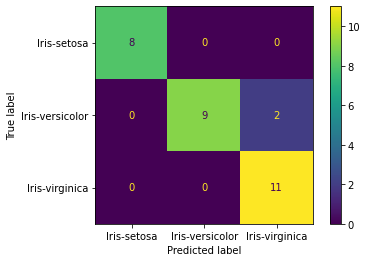

In [9]:
#Ploting the confusion matrix and classification report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

print(classification_report(y_test, y_pred))

In [10]:
#Calculating the error according to the number of neighbors
#An important feature to see wich number of neighbors is the most suitable to use

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

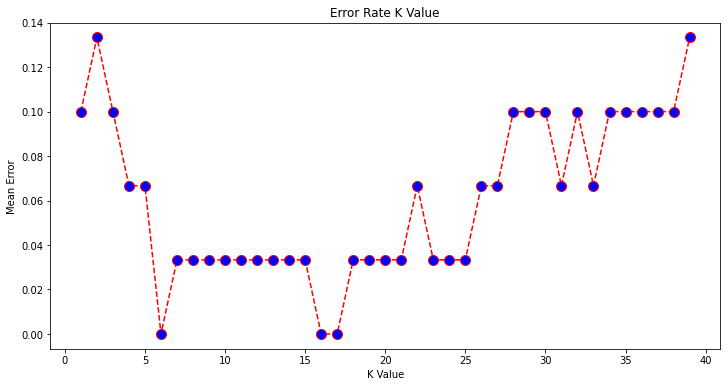

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')